In [15]:
import matplotlib.pyplot as plt
from diffusers import DDIMPipeline
import torchvision.transforms as transforms
import torch

model_id = "google/ddpm-cifar10-32"

# load model and scheduler
ddim = DDIMPipeline.from_pretrained(model_id)
transform = transforms.ToTensor()


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]An error occurred while trying to fetch C:\Users\cpfit\.cache\huggingface\hub\models--google--ddpm-cifar10-32\snapshots\267b167dc01f0e4e61923ea244e8b988f84deb80: Error no file named diffusion_pytorch_model.safetensors found in directory C:\Users\cpfit\.cache\huggingface\hub\models--google--ddpm-cifar10-32\snapshots\267b167dc01f0e4e61923ea244e8b988f84deb80.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 2/2 [00:00<00:00, 14.59it/s]


100%|██████████| 10/10 [00:03<00:00,  3.15it/s]


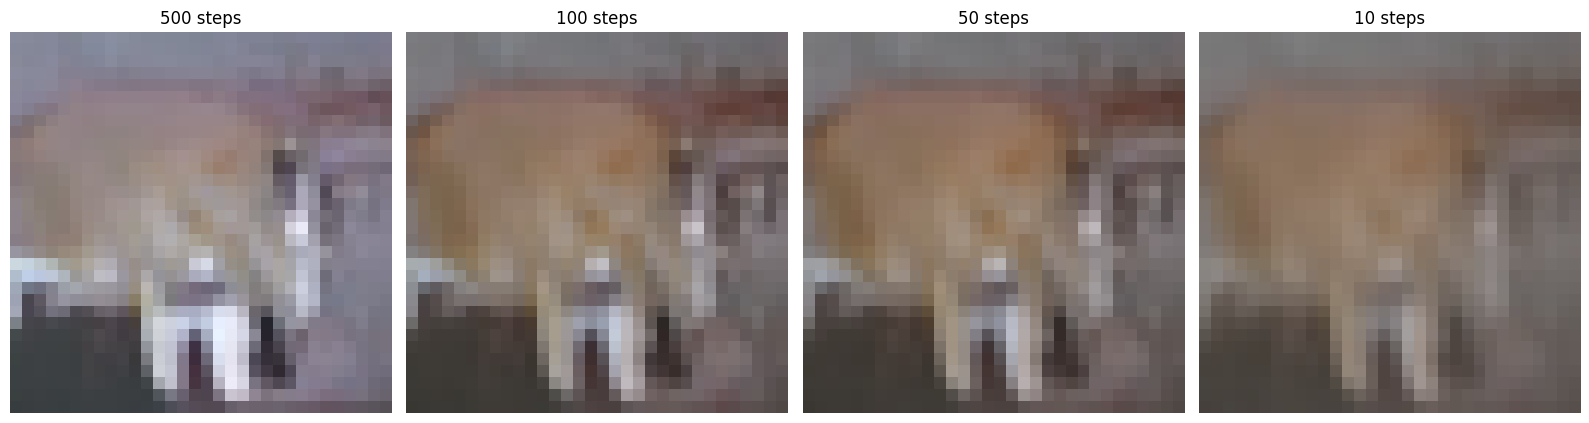

In [16]:
steps = [500, 100, 50, 10]
fig, axes = plt.subplots(1, len(steps), figsize=(16,6))
for i, step in enumerate(steps):
    generator = torch.Generator().manual_seed(100) # to start w the same noise
    image = ddim(num_inference_steps=step, generator=generator).images[0]
    image = transform(image)
    axes[i].imshow(image.permute(1,2,0).clamp(0,1))
    axes[i].set_title(f'{step} steps')
    axes[i].axis('off')
plt.tight_layout()
plt.show()